In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randrange


In [443]:
class Room():
    
    def __init__(self):
        self.contents = []
        self.coords = ([0, 195, 195, 152,   0, 0], 
                       [0,   0, 223, 223, 104, 0])
        self.fitness = 0
        self.num_boxes = randrange(1, 16)
        self.slope = 0.0
        self.calcSlope()
        self.generateBoxes(self.num_boxes)
        self.box_clash_fine = 20000
        self.outside_room_clash_fine = 30000
        self.calculateFitness()
        
    def generateBoxes(self, num_boxes):
        """
           Create a set of boxes for up to the limit in the model
        """
        [self.addBox() for i in range(num_boxes)]
        
    def getRandomStartCoord(self):
        """
           Get a random start coordm, the bottom left, for a box
        """
        max_x = max(self.coords[0])
        max_y = max(self.coords[1])
        x = randrange(0, max_x)
        y = randrange(0, max_y)
        return(x, y)
    
    def addBox(self):
        """
           Create box and add to the room's box collection
        """
        coord = self.getRandomStartCoord()
        b = Box(50, 40, coord)
        self.contents.append(b)
        
    def isBoxInRoomWidth(self, box):
        box_in_room_width = False
        box_width = box.width
        room_width = max(self.coords[0])
        box_width_minus_room_width = room_width - box_width
        
        if (box.x > 0) and (box.x < box_width_minus_room_width):
            box_in_room_width = True
        
        return box_in_room_width
    
    def isBoxInRoomHeight(self, box):
        box_in_room_height = False
        box_height = box.height
        room_height = max(self.coords[1])
        box_height_minus_room_height = room_height - box_height
        
        if (box.y > 0) and (box.y < box_height_minus_room_height):
            box_in_room_height = True
        
        return box_in_room_height
    
    def calcSlope(self):
        dx = float(self.coords[0][4] - self.coords[0][3])
        dy = float(self.coords[1][4] - self.coords[1][3])
        
        self.slope = dy/dx
    
    def calcDiagonalY(self, box):
        x = box.x
        m = self.slope
        room_top_left_x = self.coords[0][4]
        room_top_left_y = self.coords[1][4]
        
        c = room_top_left_x - m * room_top_left_x
        
        y = m * x + c
        y += room_top_left_y
        
        return(y)
    
    def isBoxBelowSlope(self, box):
        result = False
        predicted_y = self.calcDiagonalY(box)
        
        if (box.top_y < predicted_y):
            result = True

        return(result)
        
    def isBoxInRoom(self, box):
        
        result = False
        withinWidth = self.isBoxInRoomWidth(box)
        withinHeight = self.isBoxInRoomHeight(box)
        belowSlope = self.isBoxBelowSlope(box)
        
        if (withinWidth == True) and \
           (withinHeight == True) and \
           (belowSlope == True):
            result = True
        
        return(result)
    
    def calculateBoxInRoomScore(self):
        score = 0
        score = sum( [100 if self.isBoxInRoom(box) else -self.outside_room_clash_fine for box in self.contents] )
        
        return(score)
    
    def calculateBoxClashScore(self):
        score = 0
        for box in self.contents: 
            for otherBox in self.contents: # should this be a pop statement to prevent double counting?
                if box != otherBox:
                    is_clash = False
                    is_clash = self.areBoxesClashing(box, otherBox)
                    if (is_clash == True):
                        score -= self.box_clash_fine
                    else:
                        score += 100
        
        return(score)
    
    def areBoxesClashing(self, box, otherBox):
        result = False
        left_horiz_result = False
        right_horiz_result = False
        bottom_vert_result = False
        top_vert_result = False
        
        if (box.x >= otherBox.x) and (box.x <= otherBox.right_x): 
            left_horiz_result = True
                   
        if (box.right_x >= otherBox.x) and (box.right_x <= otherBox.right_x): 
            right_horiz_result = True
                    
        if (box.y >= otherBox.y) and (box.y <= otherBox.top_y):
            bottom_vert_result = True
                        
        if (box.top_y >= otherBox.y) and (box.y <= otherBox.top_y):
            top_vert_result = True
                    
        if (left_horiz_result or right_horiz_result) and (bottom_vert_result or top_vert_result):
            result = True
        
        return(result)
    
    def calculateFitness(self):
        self.fitness += self.calculateBoxInRoomScore()
        self.fitness += self.calculateBoxClashScore()
        return(self.fitness)
    
    def drawRoom(self):
        plt.figure()
        plt.plot(r.coords[0][0:6], 
                 r.coords[1][0:6])
        [b.drawBox() for b in self.contents]
        plt.text(0, 230, "Num boxes: " + str(self.num_boxes), fontsize = 14)
        plt.text(0, 210, "Fitness: " + str(self.fitness), fontsize = 14)
        plt.axis([-10, 210, -10, 250])
        plt.xticks([])
        plt.yticks([])
        plt.show()
    

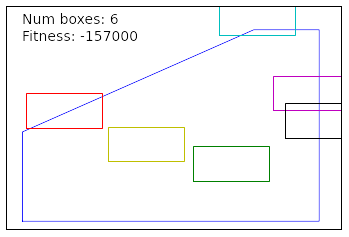

In [452]:
r = Room()
r.drawRoom()


In [313]:
class Box():
    
    def __init__(self, width, height, coord):
        self.width = width
        self.height = height
        self.x = self.left_x = coord[0]
        self.y = self.bottom_y = coord[1]
        self.right_x = self.left_x + self.width
        self.top_y = self.bottom_y + self.height
        
        self.setBoxCoords()
        
    def setBoxCoords(self):
        self.x_coords = [self.x, self.x + self.width, self.x + self.width, self.x, self.x]
        self.y_coords = [self.y, self.y, self.y + self.height, self.y + self.height, self.y]
    
       
    def drawBox(self):    
        plt.plot(self.x_coords[0:5], 
                 self.y_coords[0:5])
        
            

###Notes on simulation
* Each population will be e.g. 1000 rooms, each with a different configuration of boxes
* Sort this population by fitness of the room. The top ten can then become the population to breed from. 

1600
1600
900
900
900
900
900
900
900
900


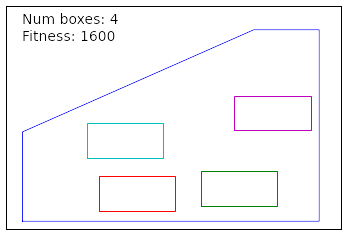

In [478]:
rooms = [Room() for i in range(10000)]
rooms.sort(key = lambda x: x.fitness, reverse = True)

for r in rooms[0:10]: print r.fitness
    
rooms[0].drawRoom()